# Machine Learning
# TP4 Introduction to Deep Neural Networks

We will gain a first experience in Neural Networks through the `Keras` module. We will apply its methods to the MNIST dataset. 

Importing the Machine Learning modules:

In [1]:
import keras, sklearn
# suppress tensorflow compilation warnings
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

Importing numpy and matplotlib:

In [2]:
import numpy as np
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)
import matplotlib.pyplot as plt

### Step 1: Load and pre-process the data

Here the data is shuffled and split between a training and a test set. The input data (X) is reshaped as a 1-dimensional array (column vector). The pixel values are converted to `float32` type and cast from [0;255] to [0;1]. The categorical data (namely the labels Y) is turned into an array of one-hot vectors.

In [3]:
from keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
# input image dimensions
num_classes = 10 # 10 digits
img_rows, img_cols = 28, 28 # number of pixels 

In [5]:
# reshape data, depending on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

an example of a data point with label 4


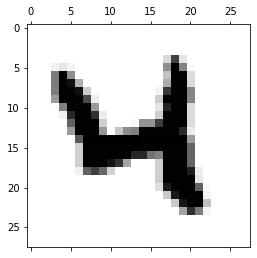

In [6]:
# look at an example of data point
print('an example of a data point with label', Y_train[20])
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

In [7]:
# convert class vectors to binary class matrices (one-hot vector)
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [8]:
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 784)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


### Step 2: Define the Neural Net and its Architecture

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

In [10]:
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
            # always ReLU ...
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
            # multi-class classification 
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


### Step 3: Choose the Optimizer and the Cost Function

In [11]:
def compile_model(optimizer=keras.optimizers.Adam()):
    # create the mode
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  # using cross-entropy as loss function
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


### Step 4: Train the model

In [12]:
# training parameters
batch_size = 64
epochs = 10

In [13]:
# create the deep neural net
model_DNN = compile_model()

In [14]:
# train DNN and store training info in history
history_DNN = model_DNN.fit(X_train, Y_train,
                            batch_size=batch_size,
                            epochs=epochs, verbose=1,
                            validation_data=(X_test, Y_test))
# "validation_data"? Doc says: "The model will not be trained on this data." -> only for monitoring the training

Epoch 1/10
938/938 [==============================] - 39s 42ms/step - loss: 0.3071 - accuracy: 0.9092 - val_loss: 0.1194 - val_accuracy: 0.9638
Epoch 2/10
938/938 [==============================] - 42s 45ms/step - loss: 0.1282 - accuracy: 0.9631 - val_loss: 0.0918 - val_accuracy: 0.9712
Epoch 3/10
938/938 [==============================] - 41s 43ms/step - loss: 0.0909 - accuracy: 0.9735 - val_loss: 0.0819 - val_accuracy: 0.9741
Epoch 4/10
938/938 [==============================] - 50s 53ms/step - loss: 0.0712 - accuracy: 0.9787 - val_loss: 0.0736 - val_accuracy: 0.9778
Epoch 5/10
938/938 [==============================] - 40s 43ms/step - loss: 0.0564 - accuracy: 0.9828 - val_loss: 0.0729 - val_accuracy: 0.9796
Epoch 6/10
938/938 [==============================] - 37s 40ms/step - loss: 0.0467 - accuracy: 0.9855 - val_loss: 0.0732 - val_accuracy: 0.9791
Epoch 7/10
938/938 [==============================] - 37s 40ms/step - loss: 0.0376 - accuracy: 0.9885 - val_loss: 0.0772 - val_accuracy:

Why mini-batches are good practice: faster computation + better generalization

### Saving the model because training takes time.

In [15]:
model_DNN.save("model_DNN")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model_DNN/assets


In [16]:
import pickle 

with open('model_DNN_history.pkl', 'wb') as file_out:
    pickle.dump(history_DNN.history, file_out)

### Load model and its history

In [17]:
# load model
from keras.models import load_model
model_DNN = load_model("model_DNN")

In [18]:
# load history
history_DNN = pickle.load(open('model_DNN_history.pkl', 'rb'))

### Step 5: Evaluate the model performance on the test set

In [19]:
# evaluate model on the unseen data set
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 5s 15ms/step - loss: 0.0813 - accuracy: 0.9798

Test loss: 0.08128918707370758
Test accuracy: 0.9797999858856201


We can plot the accuracy of the model during training:

Text(0.5, 1.0, 'Accuracy history of the basic NN')

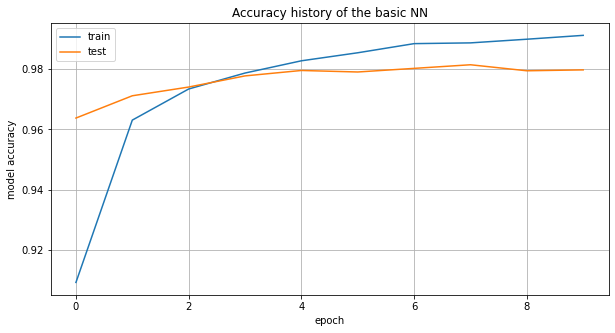

In [22]:
# Plot accuracy
plt.figure(figsize=[10, 5])
plt.plot(history_DNN['accuracy'])
plt.plot(history_DNN['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test'], loc='best')
plt.title("Accuracy history of the basic NN")

And the loss plot (more convenient for analysis since the loss function is continuous):

Text(0.5, 1.0, 'Loss history of the basic NN')

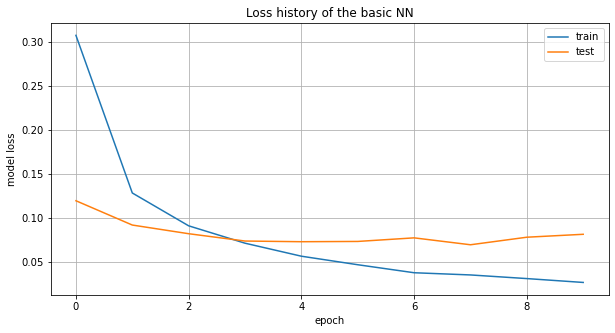

In [23]:
# Plot loss
plt.figure(figsize=[10, 5])
plt.plot(history_DNN['loss'])
plt.plot(history_DNN['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test'], loc='best')
plt.title("Loss history of the basic NN")

*Comment*: As expected, the longer the training, the smaller the training set's loss. However on the unseen data, loss decreases for 3 epochs, then stays constant and finally starts increasing again from the 8th epoch on. A 4-epoch training thus seems to provide the less overfitting model.

#### Without dropout

In [24]:
# create the model_nodropout
# same as before without the dropout thing.
model_nodropout = Sequential()
model_nodropout.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
model_nodropout.add(Dense(100, activation='relu'))
model_nodropout.add(Dense(num_classes, activation='softmax'))

# compile the model
model_nodropout.compile(loss=keras.losses.categorical_crossentropy,
                        optimizer=keras.optimizers.Adam(), 
                        metrics=['accuracy'])

# train DNN and store training info in history
history_nodropout = model_nodropout.fit(X_train, Y_train, batch_size=batch_size,
                                        epochs=epochs, verbose=1,
                                        validation_data=(X_test, Y_test))

Epoch 1/10
938/938 [==============================] - 40s 42ms/step - loss: 0.2140 - accuracy: 0.9381 - val_loss: 0.1028 - val_accuracy: 0.9690
Epoch 2/10
938/938 [==============================] - 39s 42ms/step - loss: 0.0828 - accuracy: 0.9744 - val_loss: 0.0832 - val_accuracy: 0.9737
Epoch 3/10
938/938 [==============================] - 39s 41ms/step - loss: 0.0561 - accuracy: 0.9819 - val_loss: 0.0746 - val_accuracy: 0.9765
Epoch 4/10
938/938 [==============================] - 41s 44ms/step - loss: 0.0401 - accuracy: 0.9873 - val_loss: 0.0771 - val_accuracy: 0.9757
Epoch 5/10
938/938 [==============================] - 40s 43ms/step - loss: 0.0310 - accuracy: 0.9896 - val_loss: 0.0776 - val_accuracy: 0.9770
Epoch 6/10
938/938 [==============================] - 42s 44ms/step - loss: 0.0259 - accuracy: 0.9918 - val_loss: 0.0773 - val_accuracy: 0.9784
Epoch 7/10
938/938 [==============================] - 41s 44ms/step - loss: 0.0211 - accuracy: 0.9927 - val_loss: 0.0809 - val_accuracy:

In [25]:
# evaluate model
score_nodropout = model_nodropout.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score_nodropout[0])
print('Test accuracy:', score_nodropout[1])

313/313 [==============================] - 5s 17ms/step - loss: 0.0940 - accuracy: 0.9782

Test loss: 0.09401233494281769
Test accuracy: 0.9782000184059143


Text(0.5, 1.0, 'Loss history of the NN without Dropout')

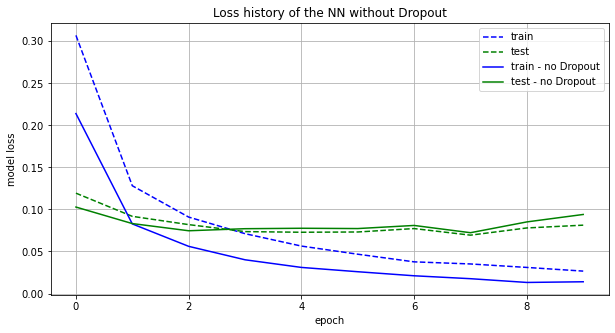

In [57]:
# Plot loss during training
plt.figure(figsize=[10, 5])
plt.plot(history_DNN['loss'], 'b--')
plt.plot(history_DNN['val_loss'], 'g--')
plt.plot(history_nodropout.history['loss'], 'b-')
plt.plot(history_nodropout.history['val_loss'], 'g-')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test', 'train - no Dropout', 'test - no Dropout'], loc='best')
plt.title("Loss history of the NN without Dropout")

*Comment*: The model trains faster without Dropout, as can be seen by comparing both 'train' curves. More importantly, when the models start to overfit, the model trained without Dropout takes off faster than its Dropout counterpart (at 7 epochs). This illustrates the exepected regularization effect induced by dropping neurons randomly during the training phase.

## Part 2: Creating Convolutional Neural Nets with Keras

In [28]:
Y_CNN_train = Y_train
Y_CNN_test = Y_test

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_CNN_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_CNN_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_CNN_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_CNN_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_CNN_train.shape)
print('Y_train shape:', Y_CNN_train.shape)
print()
print(X_CNN_train.shape[0], 'train samples')
print(X_CNN_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [29]:
from keras.layers import Conv2D, MaxPooling2D

In [30]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    # add 2D pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # add second convolutional layer with 20 filters
    model.add(Conv2D(20, (5, 5), activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # add 2D pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # flatten data
    model.add(Flatten())
    # add a dense all-to-all relu layer
    model.add(Dense(20*4*4, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adam',
                  metrics=['accuracy'])
    
    return model

In [31]:
# create the deep conv net
model_CNN = create_CNN()

In [32]:
# train CNN
history_CNN = model_CNN.fit(X_CNN_train, Y_CNN_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_data=(X_CNN_test, Y_CNN_test))

Epoch 1/10
938/938 [==============================] - 104s 111ms/step - loss: 0.3128 - accuracy: 0.9018 - val_loss: 0.1126 - val_accuracy: 0.9769
Epoch 2/10
938/938 [==============================] - 105s 112ms/step - loss: 0.1167 - accuracy: 0.9642 - val_loss: 0.0777 - val_accuracy: 0.9824
Epoch 3/10
938/938 [==============================] - 105s 112ms/step - loss: 0.0880 - accuracy: 0.9728 - val_loss: 0.0556 - val_accuracy: 0.9862
Epoch 4/10
938/938 [==============================] - 107s 114ms/step - loss: 0.0774 - accuracy: 0.9763 - val_loss: 0.0445 - val_accuracy: 0.9893
Epoch 5/10
938/938 [==============================] - 106s 113ms/step - loss: 0.0727 - accuracy: 0.9776 - val_loss: 0.0451 - val_accuracy: 0.9896
Epoch 6/10
938/938 [==============================] - 106s 113ms/step - loss: 0.0645 - accuracy: 0.9801 - val_loss: 0.0364 - val_accuracy: 0.9902
Epoch 7/10
938/938 [==============================] - 103s 110ms/step - loss: 0.0633 - accuracy: 0.9805 - val_loss: 0.0347 -

In [35]:
# save the CNN model
model_CNN.save('model_CNN')
# save history
with open('model_CNN_history.pkl', 'wb') as file_out:
    pickle.dump(history_CNN.history, file_out)

INFO:tensorflow:Assets written to: model_CNN/assets


In [36]:
# load model
model_CNN = load_model("model_CNN")
# load history
history_CNN = pickle.load(open('model_CNN_history.pkl', 'rb'))

In [37]:
# evaluate model
score_CNN = model_CNN.evaluate(X_CNN_test, Y_CNN_test, verbose=1)

# print performance
print()
print('Test loss:', score_CNN[0])
print('Test accuracy:', score_CNN[1])

313/313 [==============================] - 11s 34ms/step - loss: 0.0317 - accuracy: 0.9921

Test loss: 0.03171057254076004
Test accuracy: 0.9921000003814697


Text(0.5, 1.0, 'Accuracy history of the CNN')

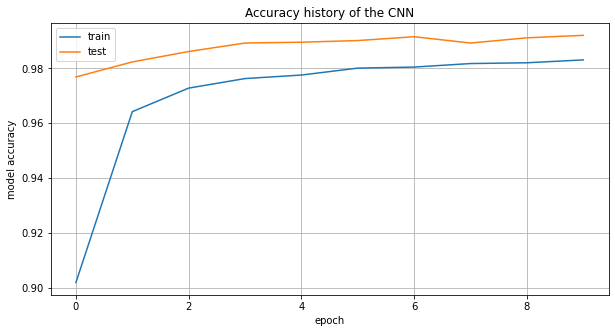

In [38]:
# Plot training history: accuracy
plt.figure(figsize=[10, 5])
plt.plot(history_CNN['accuracy'])
plt.plot(history_CNN['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test'], loc='best')
plt.title("Accuracy history of the CNN")

Text(0.5, 1.0, 'Loss history of the CNN')

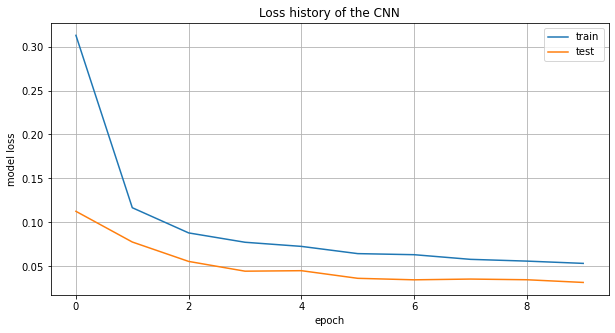

In [40]:
# Plot training history: loss function
plt.figure(figsize=[10, 5])
plt.plot(history_CNN['loss'])
plt.plot(history_CNN['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test'], loc='best')
plt.title("Loss history of the CNN")

Here we notice that the loss of the CNN training set is higher than its counterpart on the test set, which is not the typical behavior. Possible explanations found on the internet include in particular: Dropout is applied during training but is turned off during testing. This leads to an artificially higher loss on the training set. So let us check the accuracy of the model on the training set outside of the training phase:

In [34]:
# evaluate model
score_CNN_test = model_CNN.evaluate(X_CNN_test, Y_CNN_test, verbose=1)
score_CNN_train = model_CNN.evaluate(X_CNN_train, Y_CNN_train, verbose=1)

# print performance
print()
print('Test loss:', score_CNN_test[0])
print('Test accuracy:', score_CNN_test[1])
print()
print('Train loss:', score_CNN_train[0])
print('Train accuracy:', score_CNN_train[1])

1875/1875 [==============================] - 63s 34ms/step - loss: 0.0276 - accuracy: 0.9938

Test loss: 0.03171057254076004
Test accuracy: 0.9921000003814697

Train loss: 0.02756565436720848
Train accuracy: 0.9938166737556458


Ah! The model performs (slightly) better on the training set than on the test set. 

**Re-training the model while evaluating the loss on the training set.**

In [41]:
model_CNN_evaluateOnTrain = create_CNN()
history_CNN_evaluateOnTrain = model_CNN_evaluateOnTrain.fit(X_CNN_train, Y_CNN_train,
                                                            batch_size=batch_size,
                                                            epochs=epochs,
                                                            verbose=1,
                                                            validation_data=(X_CNN_train, Y_CNN_train))

Epoch 1/10
938/938 [==============================] - 127s 135ms/step - loss: 0.3126 - accuracy: 0.9024 - val_loss: 0.1192 - val_accuracy: 0.9734
Epoch 2/10
938/938 [==============================] - 127s 136ms/step - loss: 0.1303 - accuracy: 0.9597 - val_loss: 0.0852 - val_accuracy: 0.9799
Epoch 3/10
938/938 [==============================] - 128s 136ms/step - loss: 0.0985 - accuracy: 0.9689 - val_loss: 0.0585 - val_accuracy: 0.9859
Epoch 4/10
938/938 [==============================] - 128s 136ms/step - loss: 0.0823 - accuracy: 0.9747 - val_loss: 0.0473 - val_accuracy: 0.9887
Epoch 5/10
938/938 [==============================] - 131s 140ms/step - loss: 0.0733 - accuracy: 0.9766 - val_loss: 0.0443 - val_accuracy: 0.9895
Epoch 6/10
938/938 [==============================] - 129s 137ms/step - loss: 0.0647 - accuracy: 0.9797 - val_loss: 0.0353 - val_accuracy: 0.9908
Epoch 7/10
938/938 [==============================] - 132s 140ms/step - loss: 0.0611 - accuracy: 0.9811 - val_loss: 0.0376 -

Text(0.5, 1.0, 'Loss history of the CNN')

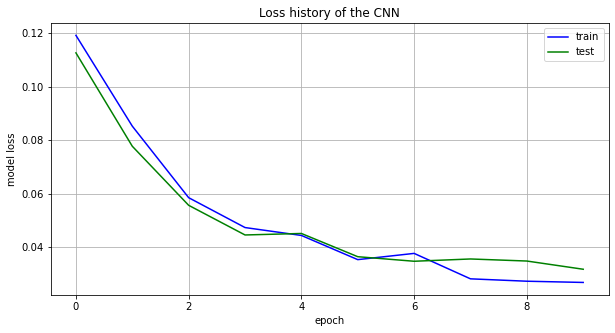

In [58]:
# Plot training history: loss function
plt.figure(figsize=[10, 5])
#plt.plot(history_CNN['loss'], 'b--')
plt.plot(history_CNN_evaluateOnTrain.history['val_loss'], 'b-')
plt.plot(history_CNN['val_loss'], 'g-')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test'], loc='best')
plt.title("Loss history of the CNN")

The model performs similarly on the train and test sets once Dropout is turned off. 

**How does CNN perform in comparison with the basic DNN ?**

Text(0.5, 1.0, 'Accuracy history of the CNN')

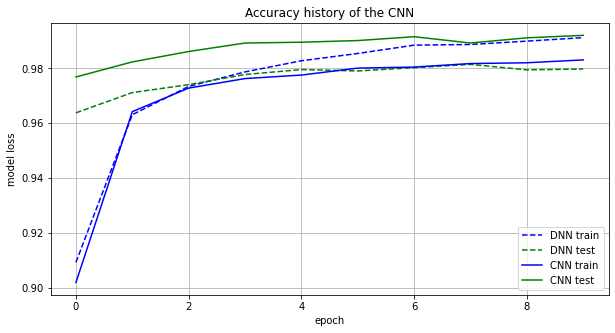

In [54]:
# Plot training history: accuracy
plt.figure(figsize=[10, 5])
plt.plot(history_DNN['accuracy'], 'b--')
plt.plot(history_DNN['val_accuracy'], 'g--')
plt.plot(history_CNN['accuracy'], 'b-')
plt.plot(history_CNN['val_accuracy'], 'g-')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.grid()
plt.legend(['DNN train', 'DNN test', 'CNN train', 'CNN test'], loc='best')
plt.title('Accuracy history of the CNN')

Text(0.5, 1.0, 'Loss history of the CNN')

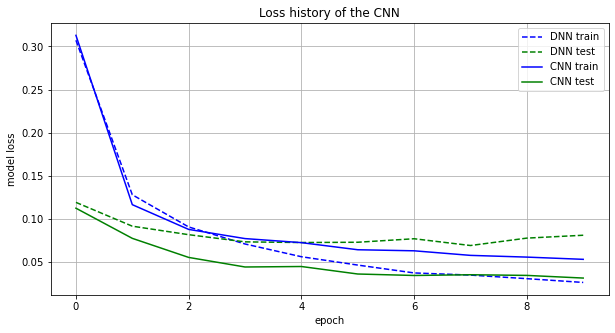

In [55]:
# Plot training history: loss function
plt.figure(figsize=[10, 5])
plt.plot(history_DNN['loss'], 'b--')
plt.plot(history_DNN['val_loss'], 'g--')
plt.plot(history_CNN['loss'], 'b-')
plt.plot(history_CNN['val_loss'], 'g-')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.grid()
plt.legend(['DNN train', 'DNN test', 'CNN train', 'CNN test'], loc='best')
plt.title("Loss history of the CNN")


The CNN performs better than the DNN. Its plateau lies close to 100% accuracy, while DNN reaches 'only' 98%.

## Conclusion

We learned how to build and train Dense and Convolutional Neural Nets with `Keras` and observed the effects of Dropout.